# Unitary Fermion Gas in BCC lattice

Compute g.s. energy of fermions in unitary limit coupling strength.

N=66 nucleons in one flavor with two spin states are placed in the BCC lattice 
in cubic boundary with length L 

In [1]:
from __future__ import print_function
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import *
from scipy import optimize 
import myutil

## Read results 

In [2]:
# read results of calculation 
out = myutil.read_fresco_res('02_BCCresults_test.dat')
# make results as numpy array
for key in out.keys():
    out[key]=np.array(out[key])

### Arrange the results 

(1) 'free' corresponds to free Fermion Gas energy of N=66 nucleons 
      
    free[n][L, exact, EH0, EM0, FG]
    where n     : L-index  such that L=L_val[n]
          exact : exact kinetic energy  
          EH0   : Hamiltonian energy 
          EM0   : Transfer energy 
          FG    : Thermodynamic expression 

(2) 'result1' corredponds to code results with Ltouter=5
    
    result1[n][L, Lt, EH0, EM0, ntot, nthr, beta_fin, beta_fg]
    where n : L-index   such that L= L_val[n]
          nLt: Lt-index such that Lt=Lt_val[nLt]
          ntot : number of configurations per processor 
          
(3) 'result2' corresdponds to code results with Ltouter=0          

In [3]:
free={}
for n in range(7):
    free[n]={};
    free[n]['L']=np.array(out[0][n,0])
    free[n]['exact']=np.array(out[0][n,1])
    free[n]['EH0']=np.array(out[0][n,2])
    free[n]['EM0']=np.array(out[0][n,3])
    free[n]['FG']=np.array(out[0][n,4])



In [4]:
#L=5,6,7 -> n=0,1,2 
result1={} #Ltouter=5
for n in [0,1,2]:
    result1[n]={}
    result1[n]['L']= out[2*n+1][:,1]
    result1[n]['Lt']= out[2*n+1][:,2]
    result1[n]['EH0']=out[2*n+1][:,3:5]
    result1[n]['EM0']=out[2*n+1][:,5:7]

    result1[n]['beta_fin']=result1[n]['EM0']/free[n]['EM0']
    result1[n]['beta_fg']=result1[n]['EM0']/free[n]['FG']
    
result2={} #Ltouter=0
for n in [0,1,2]:
    result2[n]={}
    result2[n]['L']= out[2*n+2][:,1]
    result2[n]['Lt']= out[2*n+2][:,2]
    result2[n]['EH0']=out[2*n+2][:,3:5]
    result2[n]['EM0']=out[2*n+2][:,5:7]
    result2[n]['beta_fin']=result2[n]['EM0']/free[n]['EM0']
    result2[n]['beta_fg']=result2[n]['EM0']/free[n]['FG'] 
    

## Plot results for L=5,6,7

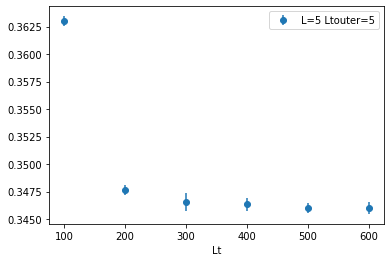

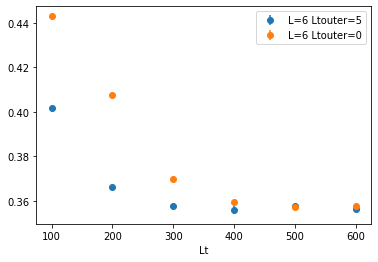

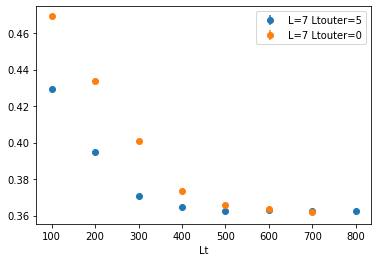

In [5]:
L=5;n=0
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
#plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
#                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

L=6;n=1
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

L=7;n=2
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

Comment: In above L=6 Ltouter=5, Lt=300 and 400 could be not have reached convergence in Ncfg.

On the other hand L=7 Ltouter=5 Lt=600 and 
                      Ltouter=0 Lt=700 may have not reached converegnce in Ncfg. 

It looks like L=5 reach convergence around Lt=400
              L=6                          Lt=500
              L=7                          Lt=600   

## Plot results for L=8,9,10 

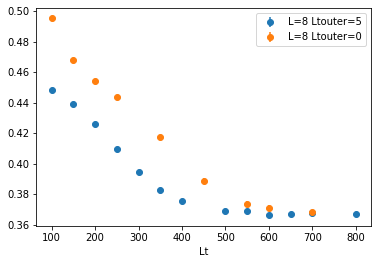

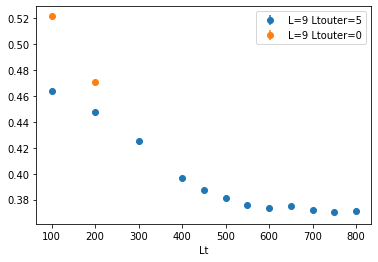

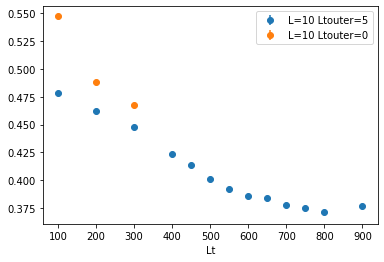

In [6]:
# L=8,9,10 -> n=3,4,5 
for n in [3,4,5]:
    result1[n]={}
    result2[n]={}
        
    result1[n]['L'] = out[7+2*(n-3)][:,1]
    result1[n]['Lt'] = out[7+2*(n-3)][:,2]
    result1[n]['EH0']= out[7+2*(n-3)][:,3:5]
    result1[n]['EM0']= out[7+2*(n-3)][:,5:7]
    result1[n]['beta_fin']=result1[n]['EM0']/free[n]['EM0']
    result1[n]['beta_fg']=result1[n]['EM0']/free[n]['FG']
    
    result2[n]['L'] = out[7+2*(n-3)+1][:,1]
    result2[n]['Lt'] = out[7+2*(n-3)+1][:,2]
    result2[n]['EH0']= out[7+2*(n-3)+1][:,3:5]
    result2[n]['EM0']= out[7+2*(n-3)+1][:,5:7]
    result2[n]['beta_fin']=result2[n]['EM0']/free[n]['EM0']
    result2[n]['beta_fg']=result2[n]['EM0']/free[n]['FG']
    
L=8;n=3
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

L=9;n=4
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

L=10;n=5
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.errorbar(result2[n]['Lt'], result2[n]['beta_fin'][:,0], yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=0'%(L))
plt.xlabel('Lt');
plt.legend()  ;

Comment: Ltouter=5 is faster to reach flat resion. 
         It looks like converegnce is reached near Lt=700 for L=8 ? 
                                                   Lt=800 for L=9 ?
                                                   Lt=900 for L=10?
                                                   Lt=1000 for L=11?

## Plot results for L=11

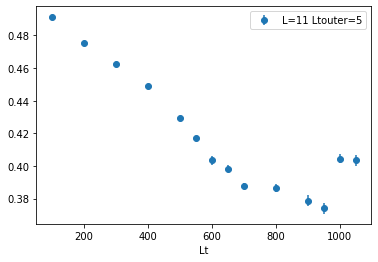

In [7]:
# L=11 -> n=6
for n in [6]:
    result1[n]={}
    result2[n]={}
    
    result1[n]['L'] = out[13+(n-6)][:,1]
    result1[n]['Lt'] = out[13+(n-6)][:,2]
    result1[n]['EH0']= out[13+(n-6)][:,3:5]
    result1[n]['EM0']= out[13+(n-6)][:,5:7]
    result1[n]['beta_fin']=result1[n]['EM0']/free[n]['EM0']
    result1[n]['beta_fg']=result1[n]['EM0']/free[n]['FG']
        
L=11;n=6
plt.figure()
plt.errorbar(result1[n]['Lt'], result1[n]['beta_fin'][:,0], yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='o',label = 'L=%i Ltouter=5'%(L))
plt.xlabel('Lt');
plt.legend()  ;

Obviously Lt>=1000 result seems to be not reached convergence. 
   It is doubtful for Lt=800, 850 and 900 too. 

# Fit and extrapolation in Lt dependence

Fit Lt dependence with exponential decaying function
Obtain asymptotic limit Lt-> infinity 

In [8]:
def fit_exp(t,E0,b,eta):
    return E0+b*np.exp(-eta*t)

In [9]:
n=0
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.362977   0.000465
200  0.347620   0.000455
300  0.346551   0.000818
400  0.346321   0.000608
500  0.346016   0.000485
600  0.346016   0.000552


In [10]:
n=1
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.401699   0.000310
200  0.366017   0.000508
300  0.357588   0.001202
400  0.355837   0.001756
500  0.357588   0.000676
600  0.356384   0.000912


In [11]:
n=2
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.429269   0.000201
200  0.394886   0.000251
300  0.370624   0.000363
400  0.364521   0.000422
500  0.362437   0.000496
600  0.362884   0.000472
700  0.362586   0.000464
800  0.362289   0.000643


L=5  E0=0.346127 +/- 0.000096   b=0.187789  eta=0.024110  
L=5  E0=0.343606 +/- 0.000096   b=0.186422  eta=0.024110  
L=5  E0=0.345032 +/- 0.001263   b=0.228258  eta=0.011758  
L=6  E0=0.356837 +/- 0.000491   b=0.221244  eta=0.015956  
L=6  E0=0.356061 +/- 0.000490   b=0.220763  eta=0.015956  
L=6  E0=0.349998 +/- 0.007668   b=0.182180  eta=0.006515  


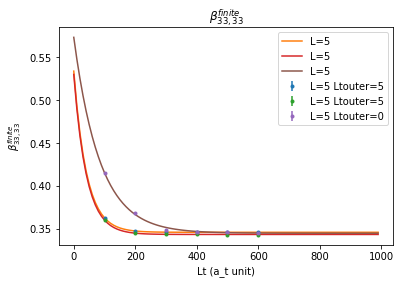

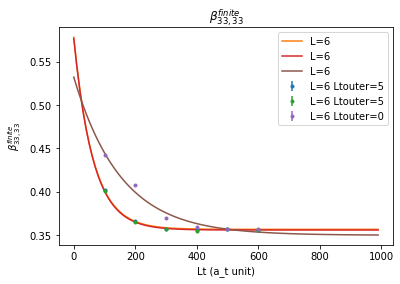

In [12]:
result1['fit']={}
result1['fit']['beta_fin']=[]
result1['fit']['beta_fg']=[]

for n in [0,1]:
    plt.figure()
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fin'][:,0]
                                              , sigma=result1[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i Ltouter=5'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fg'][:,0]
                                              , sigma=result1[n]['beta_fg'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i Ltouter=5'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    
    
    params, p_covariance = optimize.curve_fit(fit_exp, result2[n]['Lt'], result2[n]['beta_fin'][:,0]
                                              #, sigma=result2[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result2[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result2[n]['Lt'],result2[n]['beta_fin'][:,0],yerr=result2[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i Ltouter=0'%(result2[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result2[n]['L'][0])  )
    
    plt.legend()
    plt.title(r'$\beta^{finite}_{33,33}$');
    plt.xlabel('Lt (a_t unit)');
    plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

    


Fit of L=7 Ltouter=0 seems to be not good enough.. Better fitting ?? 


## L=7 Case : if we remove Lt=100 ?  

L=7  E0=0.362427 +/- 0.000168   b=0.512064  eta=0.013792  
L=7  E0=0.361969 +/- 0.000167   b=0.511417  eta=0.013792  


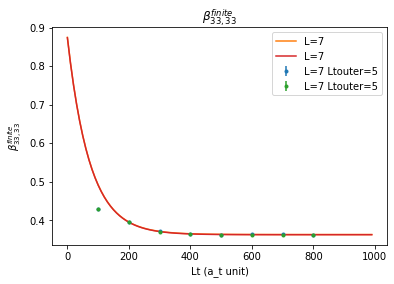

In [13]:

for n in [2]:
    plt.figure()
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][1:], result1[n]['beta_fin'][1:,0]
                                              , sigma=result1[n]['beta_fin'][1:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i Ltouter=5'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][1:], result1[n]['beta_fg'][1:,0]
                                              , sigma=result1[n]['beta_fg'][1:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i Ltouter=5'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    plt.legend()
    plt.title(r'$\beta^{finite}_{33,33}$');
    plt.xlabel('Lt (a_t unit)');
    plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L=8 case 

Need larger Lt results? 

In [14]:
n=3
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.448403   0.000216
150  0.439069   0.000231
200  0.426235   0.000252
250  0.409901   0.000583
300  0.394540   0.000315
350  0.382484   0.000444
400  0.375289   0.000568
500  0.368872   0.000898
550  0.368872   0.000596
600  0.366539   0.000747
650  0.367122   0.000740
700  0.367511   0.000750
800  0.366733   0.000672


L=8  E0=0.351232 +/- 0.009597   b=0.147116  eta=0.003760  


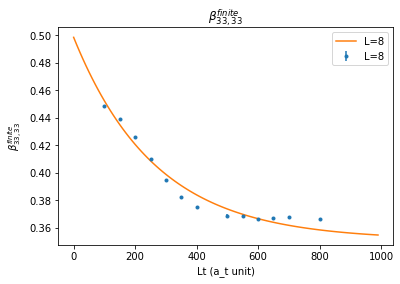

In [15]:
for n in [3]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fin'][:,0]
                                              , sigma=result1[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )

    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

If we ignore Lt=100,150 point

L=8  E0=0.364517 +/- 0.001385   b=0.286600  eta=0.007645  
L=8  E0=0.363979 +/- 0.001383   b=0.286177  eta=0.007645  


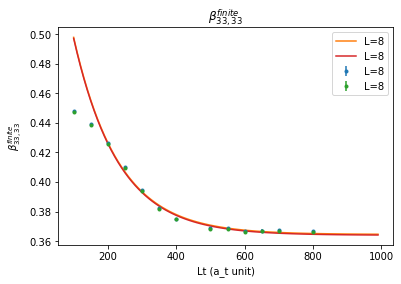

In [16]:
for n in [3]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fin'][2:,0]
                                              , sigma=result1[n]['beta_fin'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    #result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fg'][2:,0]
                                              , sigma=result1[n]['beta_fg'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    #result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

if we ignore Lt=100,150,200? 

L=8  E0=0.365973 +/- 0.000680   b=0.505370  eta=0.009676  
L=8  E0=0.365433 +/- 0.000679   b=0.504625  eta=0.009676  


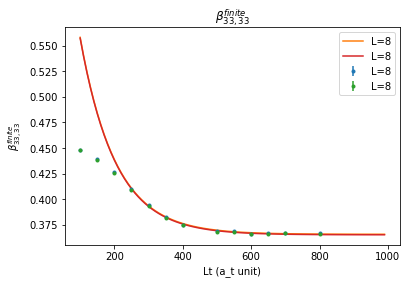

In [17]:
for n in [3]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][3:], result1[n]['beta_fin'][3:,0]
                                              , sigma=result1[n]['beta_fin'][3:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][3:], result1[n]['beta_fg'][3:,0]
                                              , sigma=result1[n]['beta_fg'][3:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L=9 

In [18]:
n=4
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.463610   0.000215
200  0.447607   0.000251
300  0.424956   0.000320
400  0.396888   0.000734
450  0.387532   0.000731
500  0.381131   0.000670
550  0.375960   0.001436
600  0.373744   0.000713
650  0.374975   0.001227
700  0.372267   0.000680
750  0.370297   0.001299
800  0.371036   0.000803


L=9  E0=0.308074 +/- 0.038254   b=0.184847  eta=0.001585  


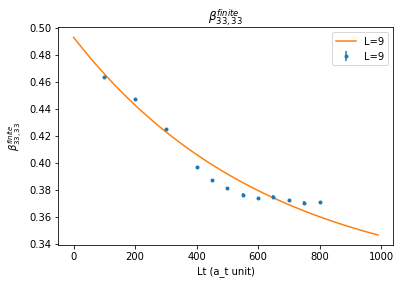

In [19]:
for n in [4]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fin'][:,0], 
                                              sigma=result1[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

### L=9 ignore Lt = 100, 200

L=9  E0=0.368950 +/- 0.000831   b=0.516829  eta=0.007404  
L=9  E0=0.368242 +/- 0.000830   b=0.515839  eta=0.007404  


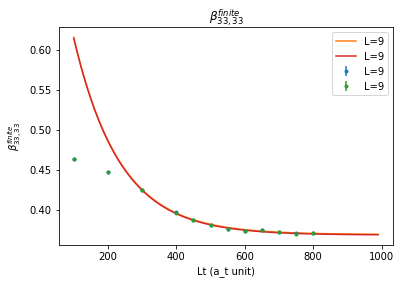

In [20]:
for n in [4]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fin'][2:,0], 
                                              sigma=result1[n]['beta_fin'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])

    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fg'][2:,0]
                                              , sigma=result1[n]['beta_fg'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )

    
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

L=9  E0=0.370265 +/- 0.000678   b=1.044457  eta=0.009159  
L=9  E0=0.369555 +/- 0.000677   b=1.042454  eta=0.009159  


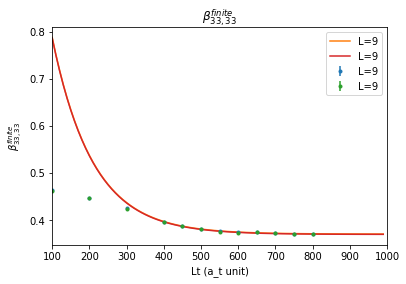

In [21]:
for n in [4]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][3:], result1[n]['beta_fin'][3:,0], 
                                              sigma=result1[n]['beta_fin'][3:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    #result1['fit']['beta_fin'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])

    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
    
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][3:], result1[n]['beta_fg'][3:,0]
                                              , sigma=result1[n]['beta_fg'][3:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    #store fitting results
    #result1['fit']['beta_fg'].append([result1[n]['L'][0],params[0],np.sqrt(p_covariance[0,0])])
    xx = np.arange(100,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fg'][:,0],yerr=result1[n]['beta_fg'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )

    
plt.legend()
plt.xlim([100,1000])
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L=10

In [22]:
n=5
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.478029   0.000278
200  0.462521   0.000326
300  0.447620   0.000393
400  0.423597   0.000785
450  0.413562   0.000807
500  0.401399   0.000649
550  0.391668   0.001673
600  0.386194   0.000875
650  0.383762   0.001624
700  0.377984   0.001058
750  0.374639   0.001824
800  0.371598   0.001909
900  0.376768   0.001498


L=10  E0=0.178028 +/- 0.164847   b=0.322867  eta=0.000670  


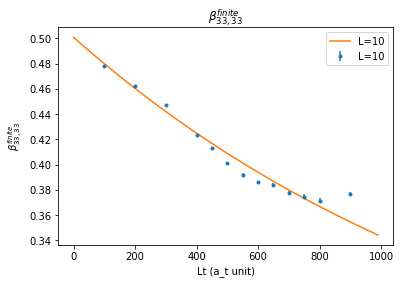

In [23]:
for n in [5]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fin'][:,0], 
                                              sigma=result1[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

### L=10 ignore Lt=100 , 200

L=10  E0=0.358694 +/- 0.006170   b=0.263461  eta=0.003605  


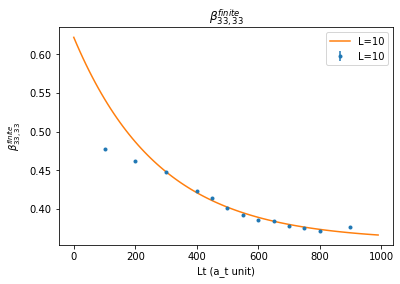

In [24]:
for n in [5]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fin'][2:,0], 
                                              sigma=result1[n]['beta_fin'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L=11

In [25]:
n=6
for i in range(len(result1[n]['Lt'])):
    print('%i  %f   %f'%(result1[n]['Lt'][i], result1[n]['beta_fin'][i,0], result1[n]['beta_fin'][i,1]))

100  0.491405   0.000335
200  0.475209   0.000434
300  0.462326   0.000722
400  0.448706   0.000689
500  0.429197   0.001269
550  0.417050   0.001362
600  0.403431   0.002579
650  0.398277   0.002056
700  0.387971   0.001661
800  0.386498   0.002607
900  0.378768   0.003354
950  0.373983   0.003393
1000  0.404535   0.002528
1050  0.403431   0.003261


L=11  E0=0.279322 +/- 0.088950   b=0.231987  eta=0.000858  


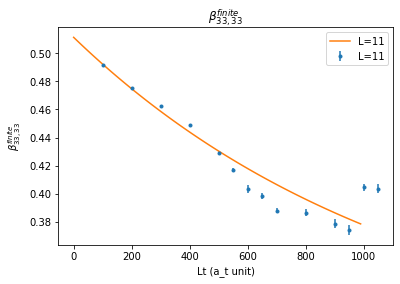

In [26]:
for n in [6]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'], result1[n]['beta_fin'][:,0], 
                                              sigma=result1[n]['beta_fin'][:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L =11 omitting Lt=100,200 result

L=11  E0=0.366161 +/- 0.023632   b=0.213043  eta=0.002539  


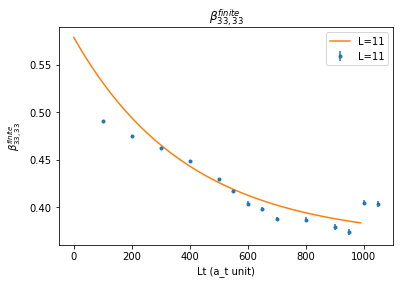

In [27]:
for n in [6]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:], result1[n]['beta_fin'][2:,0], 
                                              sigma=result1[n]['beta_fin'][2:,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## L=11 ignore last Lt>=900

L=11  E0=0.133678 +/- 0.372348   b=0.394555  eta=0.000588  


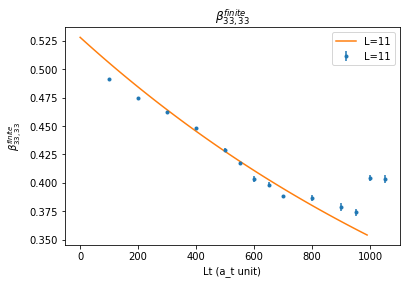

In [28]:
for n in [6]:
    params, p_covariance = optimize.curve_fit(fit_exp, result1[n]['Lt'][2:-3], result1[n]['beta_fin'][2:-3,0], 
                                              sigma=result1[n]['beta_fin'][2:-3,1]
                                              , p0 =[0.3,0.1,0.01])
    print('L=%i  E0=%f +/- %f   b=%f  eta=%f  '%(result1[n]['L'][0], params[0],np.sqrt(p_covariance[0,0]) ,params[1],params[2] )  )
    xx = np.arange(0,1000,10)
    ff = fit_exp(xx,*params)
    plt.errorbar(result1[n]['Lt'],result1[n]['beta_fin'][:,0],yerr=result1[n]['beta_fin'][:,1]
                 ,fmt='.', label='L=%i'%(result1[n]['L'][0])     )
    plt.plot(xx,ff,label='L=%i'%(result1[n]['L'][0])  )
plt.legend()
plt.title(r'$\beta^{finite}_{33,33}$');
plt.xlabel('Lt (a_t unit)');
plt.ylabel(r'$\beta^{finite}_{33,33}$') ;

## Plot L dependence of fits

Plot asympotic fitting of values for large Lt 
as a function of L

In [29]:
L_data1 = result1['fit']['beta_fin'];
L_data1 = np.array(L_data1);
print('L      beta_fin      error')
print(L_data1)

L_data2 = result1['fit']['beta_fg'];
L_data2 = np.array(L_data2);
print('L      beta_fg      error')
print(L_data2)




L      beta_fin      error
[[5.00000000e+00 3.46126520e-01 9.63952480e-05]
 [6.00000000e+00 3.56836766e-01 4.91277636e-04]
 [7.00000000e+00 3.62426710e-01 1.67521707e-04]
 [8.00000000e+00 3.65972895e-01 6.80301262e-04]
 [9.00000000e+00 3.68949625e-01 8.31391206e-04]]
L      beta_fg      error
[[5.00000000e+00 3.43606372e-01 9.56934422e-05]
 [6.00000000e+00 3.56061212e-01 4.90209935e-04]
 [7.00000000e+00 3.61968754e-01 1.67310036e-04]
 [8.00000000e+00 3.65432851e-01 6.79297788e-04]
 [9.00000000e+00 3.68242443e-01 8.29797640e-04]]


(0, 0.6)

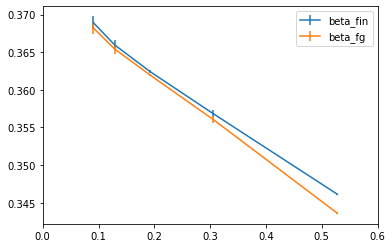

In [30]:
plt.errorbar(66/L_data1[:,0]**3, L_data1[:,1], yerr=L_data1[:,2],label='beta_fin')
plt.errorbar(66/L_data2[:,0]**3, L_data2[:,1], yerr=L_data2[:,2],label='beta_fg')
plt.legend()
plt.xlim([0,0.6])

c=0.376688 +/- 0.001593
c=0.374547 +/- 0.001111
c=0.373397 +/- 0.001787
c=0.372911 +/- 0.001070


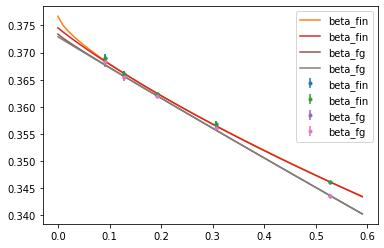

In [31]:
def Lfit_fn1(rho,c,a1,a2):
    return a1*rho+a2*rho**(2./3.)+c

def Lfit_fn2(rho,c,a1,a2):
    return a1*rho+a2*rho**(4./3.)+c

rho1 = 66/L_data1[:,0]**3
params, p_covariance = optimize.curve_fit(Lfit_fn1, rho1, L_data1[:,1], sigma=L_data1[:,2],
                                         p0=[0.37, -0.01,-0.01])
print('c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn1(xx,*params)
plt.errorbar(rho1,L_data1[:,1],yerr=L_data1[:,2], fmt='.', label='beta_fin')
plt.plot(xx,ff,label='beta_fin'  )

params, p_covariance = optimize.curve_fit(Lfit_fn2, rho1, L_data1[:,1], sigma=L_data1[:,2],
                                         p0=[0.37, -0.01,-0.01])
print('c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn2(xx,*params)
plt.errorbar(rho1,L_data1[:,1],yerr=L_data1[:,2], fmt='.', label='beta_fin')
plt.plot(xx,ff,label='beta_fin'  )


rho2 = 66/L_data2[:,0]**3
params, p_covariance = optimize.curve_fit(Lfit_fn1, rho2, L_data2[:,1], sigma=L_data2[:,2],
                                         p0=[0.37, -0.01,-0.01])
print('c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn1(xx,*params)
plt.errorbar(rho2,L_data2[:,1],yerr=L_data2[:,2], fmt='.', label='beta_fg')
plt.plot(xx,ff,label='beta_fg'  )

params, p_covariance = optimize.curve_fit(Lfit_fn2, rho2, L_data2[:,1], sigma=L_data2[:,2],
                                         p0=[0.37, -0.01,-0.01])
print('c=%f +/- %f'%(params[0],np.sqrt(p_covariance[0,0]))  )
xx = np.arange(0,0.6,0.01)
ff = Lfit_fn2(xx,*params)
plt.errorbar(rho2,L_data2[:,1],yerr=L_data2[:,2], fmt='.', label='beta_fg')
plt.plot(xx,ff,label='beta_fg'  )
plt.legend()

In [32]:
Lfit_fn2(rho1,*params)

array([0.34360879, 0.35574859, 0.36201097, 0.36556255, 0.36772469])